<h1>Author: Iptihal Yousri Ibrahim</h1>
<h3>CodeAlpha Task_1 : Credit Scoring Model</h3>
<h4>Develop a credit scoring model to predict the creditworthiness of individuals based on historical financial data. Utilize classification algorithms and assess the model's accuracy.</h4>

## Import Libraries and Read Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Credit score/Credit_score.csv')

## EDA and Preprocessing

Get first and last samples

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


Get data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Display Dataset Statistics

In [6]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


check null values

In [7]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

check duplication

In [8]:
df.duplicated().any()

False

Shape of the data

In [9]:
df.shape

(100000, 28)

check values of each feature

> Payment_of_Min_Amount Feature

In [10]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

------------  we need to edit 'NM' to be 'No'  ------------

In [11]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [12]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     47674
Name: Payment_of_Min_Amount, dtype: int64

> Payment_Behaviour Feature

In [13]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

------------  we need to delet "!@9#%8"  ------------

In [14]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [15]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

> Occupation Feature

In [16]:
df["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

------------ we need to delet "_______" ------------

In [17]:
df["Occupation"]=df["Occupation"].replace("_______",np.nan)

In [18]:
df["Occupation"].value_counts()

Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

> Credit_Mix Feature

In [19]:
df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

------------ we need to delet "_" ------------

In [20]:
df["Credit_Mix"]=df["Credit_Mix"].replace("_",np.nan)

In [21]:
df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
Bad         18989
Name: Credit_Mix, dtype: int64

> Credit_Score Feature

In [22]:
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

> Monthly_Balance Feature

In [23]:
df['Monthly_Balance'].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

------------ we need to delet "__-333333333333333333333333333__" ------------

In [24]:
df["Monthly_Balance"]=df["Monthly_Balance"].replace("__-333333333333333333333333333__",np.nan)

In [25]:
df['Monthly_Balance'].value_counts()

312.49408867943663    1
270.9110140679162     1
254.9709216273975     1
250.0931678204641     1
289.7550752754317     1
                     ..
366.2890379762706     1
151.1882696261166     1
306.75027851710234    1
278.8720257394474     1
393.6736955618808     1
Name: Monthly_Balance, Length: 98791, dtype: int64

> Changed_Credit_Limit Feature

In [26]:
df['Changed_Credit_Limit'].value_counts()

_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

------------ we need to delet "_" ------------

In [27]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].replace("_",np.nan)

In [28]:
df['Changed_Credit_Limit'].value_counts()

8.22                  133
11.5                  127
11.32                 126
10.06                 121
7.35                  121
                     ... 
-1.84                   1
0.8899999999999999      1
28.06                   1
1.5599999999999996      1
21.17                   1
Name: Changed_Credit_Limit, Length: 4383, dtype: int64

Drop null values and not needed features

In [29]:
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'Age', 'Num_of_Loan', 'Credit_History_Age', 'Num_of_Delayed_Payment', 'Annual_Income', 'Outstanding_Debt', 'Month', 'SSN', 'Amount_invested_monthly', 'Type_of_Loan']
df.drop(columns=columns_to_drop, inplace=True)

In [30]:
df.dropna(axis=0, inplace=True)

In [31]:
df.shape

(55221, 15)

## Visualization

Univariate Analysis

> Check outliers

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

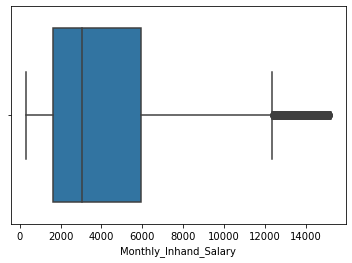

In [32]:
sns.boxplot(df['Monthly_Inhand_Salary'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

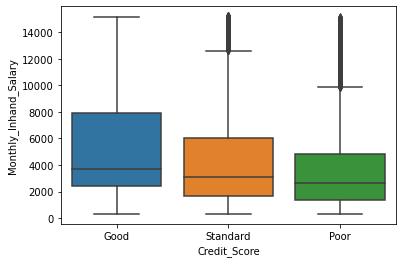

In [33]:
 sns.boxplot(x='Credit_Score',y='Monthly_Inhand_Salary', data=df)

<AxesSubplot:xlabel='Delay_from_due_date'>

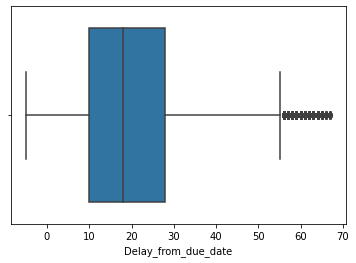

In [34]:
sns.boxplot(df['Delay_from_due_date'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Delay_from_due_date'>

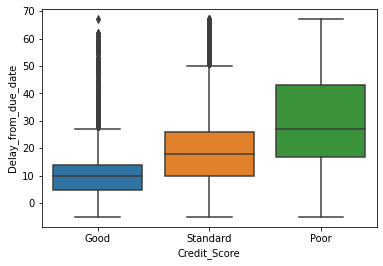

In [35]:
 sns.boxplot(x='Credit_Score',y='Delay_from_due_date', data=df)

<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

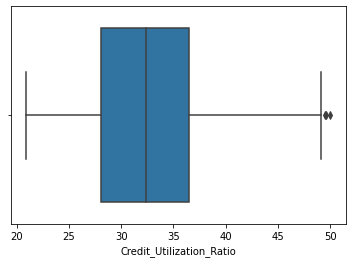

In [36]:
sns.boxplot(df['Credit_Utilization_Ratio'])

<AxesSubplot:xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

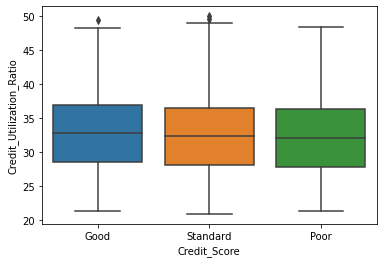

In [37]:
 sns.boxplot(x='Credit_Score',y='Credit_Utilization_Ratio', data=df)

>Check distripution

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Density'>

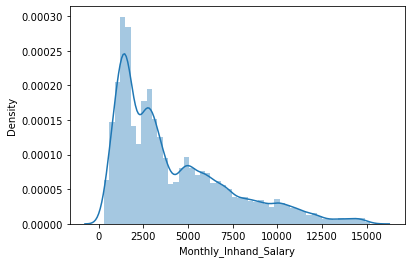

In [38]:
sns.distplot(df['Monthly_Inhand_Salary'])

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Density'>

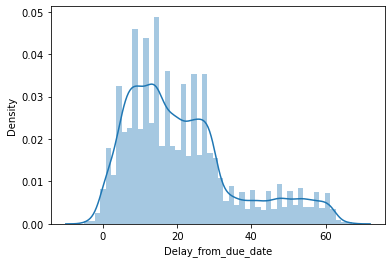

In [39]:
sns.distplot(df['Delay_from_due_date'])

<AxesSubplot:xlabel='Credit_Utilization_Ratio', ylabel='Density'>

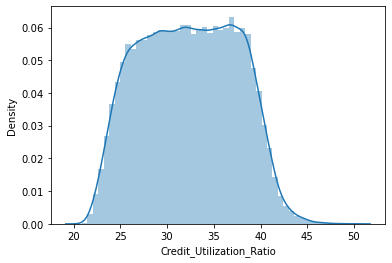

In [40]:
sns.distplot(df['Credit_Utilization_Ratio'])

> cout plots

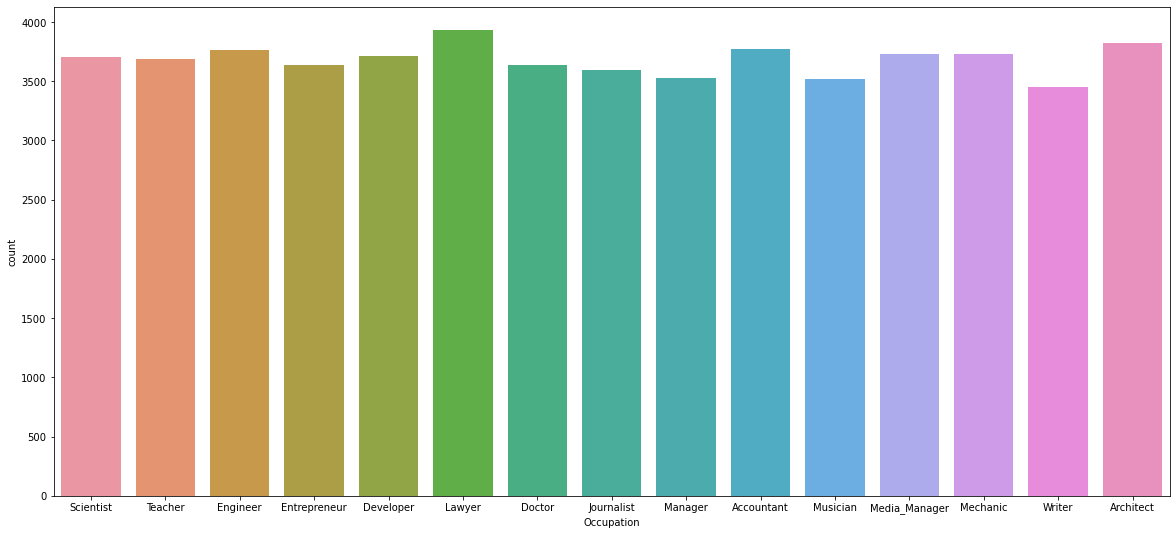

In [41]:
plt.figure(figsize=(20,9))
sns.countplot(data=df, x='Occupation')
plt.show()

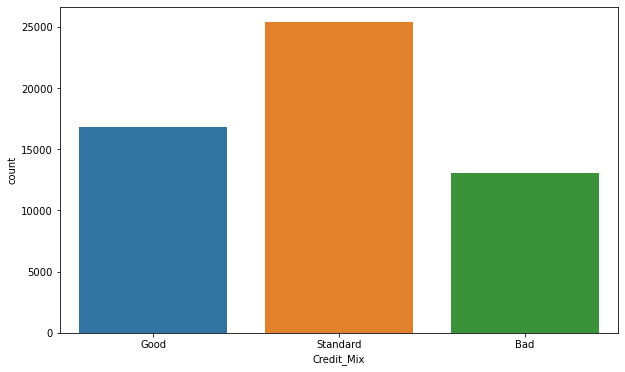

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Credit_Mix')
plt.show()

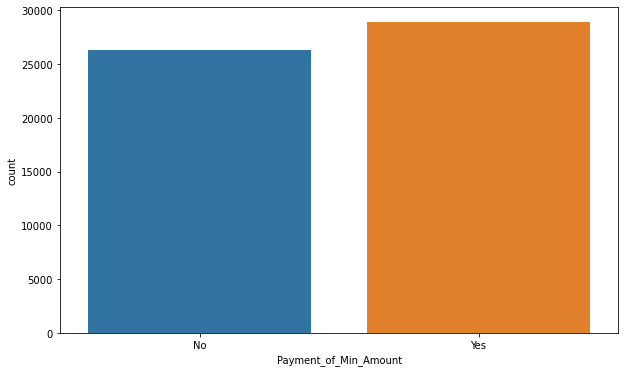

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Payment_of_Min_Amount')
plt.show()

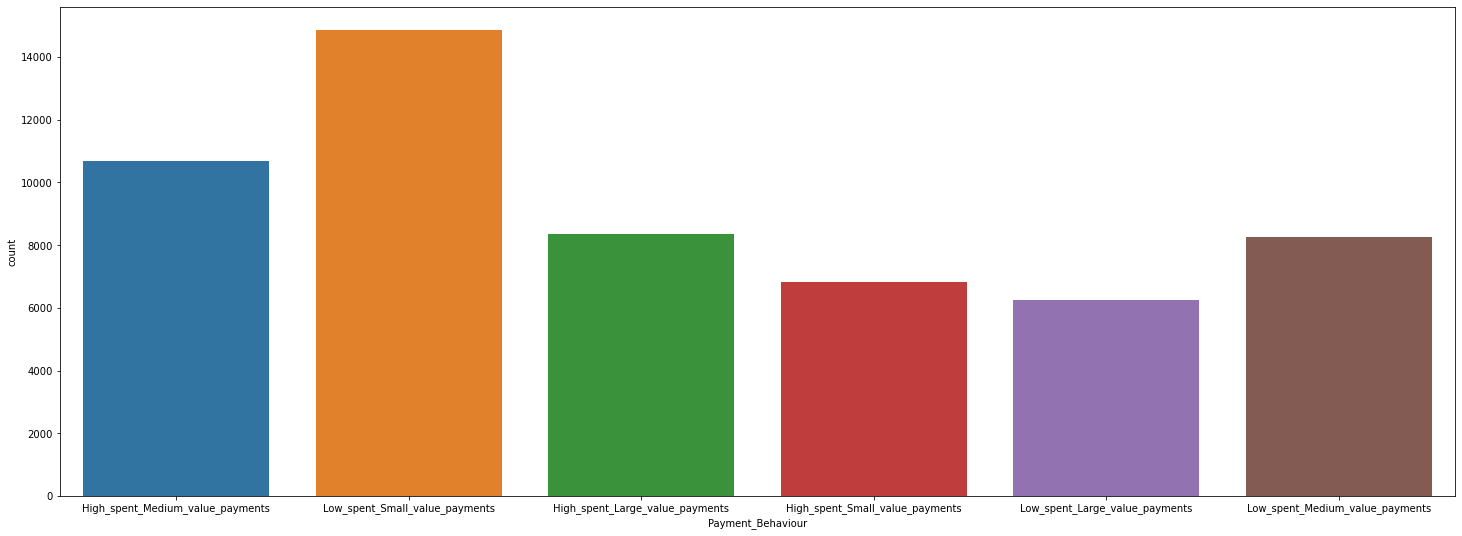

In [44]:
plt.figure(figsize=(25,9))
sns.countplot(data=df, x='Payment_Behaviour')
plt.show()

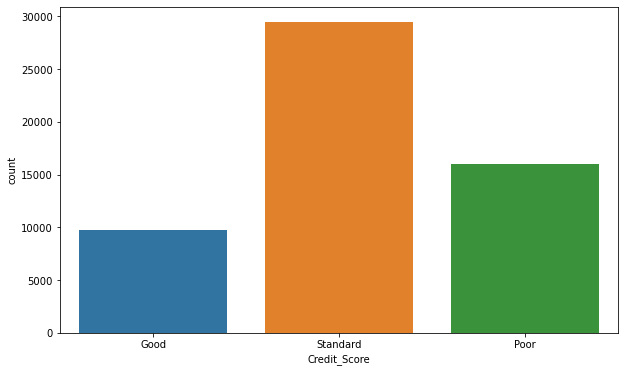

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Credit_Score')
plt.show()

> Bivariate Analysis

<AxesSubplot:>

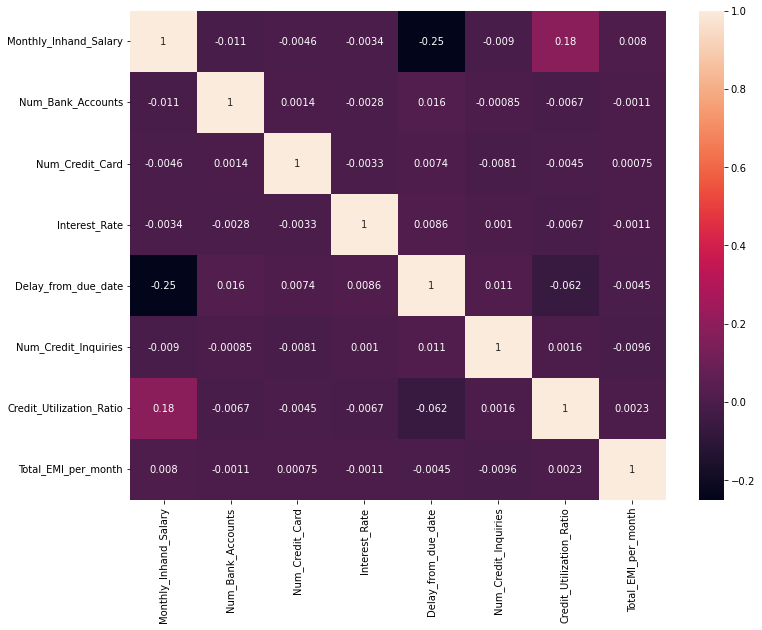

In [46]:
plt.figure(figsize = (12,9))
sns.heatmap(df.corr(), annot=True)

**Encoding Data**

In [47]:
from sklearn.preprocessing import LabelEncoder
LabelEncoderModel = LabelEncoder()
df['Occupation'] = LabelEncoderModel.fit_transform(df['Occupation'])

In [48]:
df['Credit_Mix'] = LabelEncoderModel.fit_transform(df['Credit_Mix'])

In [49]:
df['Payment_of_Min_Amount'] = LabelEncoderModel.fit_transform(df['Payment_of_Min_Amount'])

In [50]:
df['Payment_Behaviour'] = LabelEncoderModel.fit_transform(df['Payment_Behaviour'])

In [51]:
df['Credit_Score'] = LabelEncoderModel.fit_transform(df['Credit_Score'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55221 entries, 4 to 99998
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Occupation                55221 non-null  int32  
 1   Monthly_Inhand_Salary     55221 non-null  float64
 2   Num_Bank_Accounts         55221 non-null  int64  
 3   Num_Credit_Card           55221 non-null  int64  
 4   Interest_Rate             55221 non-null  int64  
 5   Delay_from_due_date       55221 non-null  int64  
 6   Changed_Credit_Limit      55221 non-null  object 
 7   Num_Credit_Inquiries      55221 non-null  float64
 8   Credit_Mix                55221 non-null  int32  
 9   Credit_Utilization_Ratio  55221 non-null  float64
 10  Payment_of_Min_Amount     55221 non-null  int32  
 11  Total_EMI_per_month       55221 non-null  float64
 12  Payment_Behaviour         55221 non-null  int32  
 13  Monthly_Balance           55221 non-null  object 
 14  Credit

## Machine Learning Model

spliting data

In [53]:
from sklearn.metrics import classification_report

In [54]:
X = df.drop('Credit_Score',axis=1)
y = df.Credit_Score

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=42)

### Logistic Regression

In [56]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression()

In [57]:
# Score of model
print('Score of train data = ', round(LogisticRegressionModel.score(X_train, y_train), 4))
print('Score of test data = ', round(LogisticRegressionModel.score(X_test,y_test), 4))

Score of train data =  0.5648
Score of test data =  0.5603


In [58]:
preds = LogisticRegressionModel.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.51      0.04      0.07      1960
           1       0.63      0.25      0.35      3262
           2       0.55      0.91      0.69      5823

    accuracy                           0.56     11045
   macro avg       0.56      0.40      0.37     11045
weighted avg       0.57      0.56      0.48     11045



### SVC

In [59]:
# SVC Model
from sklearn.svm import SVC
SVCModel = SVC(C=0.5, kernel='rbf')
SVCModel.fit(X_train, y_train)

SVC(C=0.5)

In [60]:
# Score of model
print('Score of train data = ', round(SVCModel.score(X_train, y_train), 4))
print('Score of test data = ', round(SVCModel.score(X_test, y_test), 4))

Score of train data =  0.5348
Score of test data =  0.5272


In [61]:
preds = SVCModel.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1960
           1       0.00      0.00      0.00      3262
           2       0.53      1.00      0.69      5823

    accuracy                           0.53     11045
   macro avg       0.18      0.33      0.23     11045
weighted avg       0.28      0.53      0.36     11045



### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
GNBC = GaussianNB()
GNBC.fit(X_train, y_train)

GaussianNB()

In [63]:
# Score of model
print('Score of train data = ', round(GNBC.score(X_train, y_train), 4))
print('Score of test data = ', round(GNBC.score(X_test, y_test), 4))

Score of train data =  0.6091
Score of test data =  0.6062


In [64]:
preds = GNBC.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.47      0.78      0.58      1960
           1       0.61      0.51      0.55      3262
           2       0.69      0.61      0.65      5823

    accuracy                           0.61     11045
   macro avg       0.59      0.63      0.59     11045
weighted avg       0.63      0.61      0.61     11045



### Random Forest Classifier

In [160]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(n_estimators=100, criterion='entropy')
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [161]:
# Score of model
print('Score of train data = ', round(RandomForestClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(RandomForestClassifierModel.score(X_test, y_test), 4))

Score of train data =  1.0
Score of test data =  0.7593


In [162]:
preds = RandomForestClassifierModel.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1960
           1       0.78      0.72      0.75      3262
           2       0.77      0.80      0.79      5823

    accuracy                           0.76     11045
   macro avg       0.75      0.74      0.74     11045
weighted avg       0.76      0.76      0.76     11045



### XGBoosting

In [163]:
from sklearn.ensemble import GradientBoostingClassifier
XGBoost = GradientBoostingClassifier()
XGBoost.fit(X_train, y_train)

GradientBoostingClassifier()

In [164]:
# Score of model
print('Score of train data = ', round(XGBoost.score(X_train, y_train), 4))
print('Score of test data = ', round(XGBoost.score(X_test, y_test), 4))

Score of train data =  0.7103
Score of test data =  0.6965


In [165]:
preds = XGBoost.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.67      0.61      1960
           1       0.74      0.60      0.66      3262
           2       0.73      0.76      0.74      5823

    accuracy                           0.70     11045
   macro avg       0.68      0.68      0.67     11045
weighted avg       0.70      0.70      0.70     11045



**Summary**

according to the preveous models:
> Random Forest Model has the best accurecy = 76
.so i will predict the test data

In [180]:
y_pred = RandomForestClassifierModel.predict(X_test)

In [181]:
y_pred

array([0, 2, 0, ..., 2, 1, 2])

In [183]:
# Confusion Metric
from sklearn.metrics import confusion_matrix
ConfusionMetricModel = confusion_matrix(y_test, y_pred)
ConfusionMetricModel

array([[1381,   21,  558],
       [ 100, 2351,  811],
       [ 518,  651, 4654]], dtype=int64)

Text(69.0, 0.5, 'Truth')

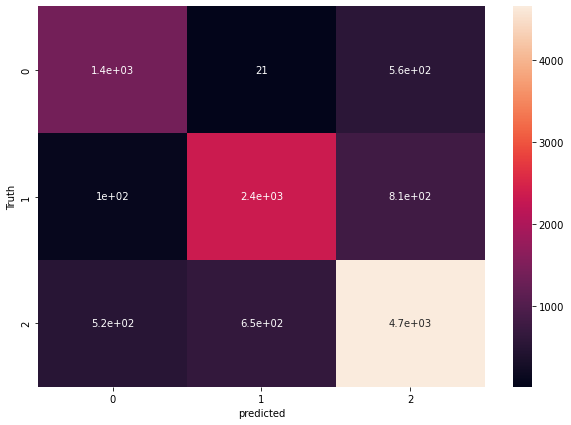

In [184]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')